# Context : Data Exploration




Source : https://www.amundietf.fr/fr/particuliers/produits/equity/amundi-msci-world-ucits-etf-eur-c/lu1681043599




**Description**

Exploratory Data Analysis of Amundi MSCI World UCITS ETF - EUR (C) - LU1681043599


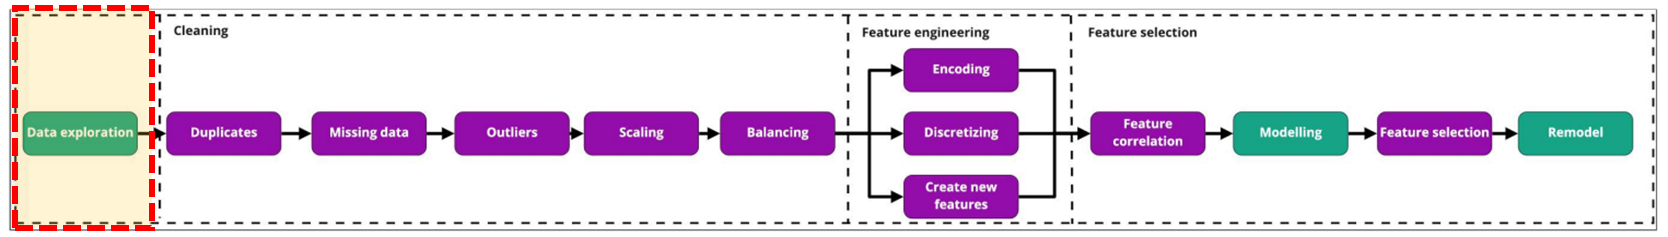


# Imports

In [1]:
import warnings
warnings.filterwarnings(action = 'ignore')
# pd.options.display.max_columns = None

import pandas as pd
import numpy as np
from scipy.stats import iqr

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Models
from sklearn.model_selection import train_test_split

# Retrieve data

In [2]:
#Retrieve data
path_to_data = '../data/raw_data/'
path_to_data = path_to_data + 'MSCI_World_UCITS_ETF_EUR_C_LU1681043599.xlsx'
path_to_data


'../data/raw_data/MSCI_World_UCITS_ETF_EUR_C_LU1681043599.xlsx'

In [3]:
# Retrieve data from excel file
msci_world = pd.read_excel( io = path_to_data,         
                            sheet_name = 'Actifs du fonds',

                            # Line used for column names                 
                            header = 1,

                            #List of column names to use.               
                            names=['Code ISIN', 'Nom', "Classe d'actifs",'Devise','Poids','Secteur','Pays'],

                            # Column (0-indexed) to use as the row labels of the DataFrame
                            # index_col = 'Code ISIN',

                            #If list of string, then indicates list of column names to be parsed.
                            usecols=['Code ISIN', 'Nom', "Classe d'actifs",'Devise','Poids','Secteur','Pays'],

                            # Engine compatibility
                            engine = 'openpyxl')
msci_world.head(3)

,Code ISIN,Nom,Classe d'actifs,Devise,Poids,Secteur,Pays
0,DE0007164600,SAP SE / XETRA,EQUITY,EUR,0.079253,Technologies de l'information,Allemagne
1,IE000S9YS762,LINDE PLC,EQUITY,USD,0.053559,Matériaux,États-Unis
2,DK0062498333,NOVO NORDISK A/S-B,EQUITY,DKK,0.051679,Santé,Danemark


# Explore data


## Generic data

In [4]:
# Shape
msci_world.shape

(152, 7)

In [5]:
# Columns
msci_world.columns

Index(['Code ISIN', 'Nom', 'Classe d'actifs', 'Devise', 'Poids', 'Secteur',
       'Pays'],
      dtype='object')

In [6]:
# Statistics
msci_world.describe()

,Poids
count,152.000000
mean,0.005978
std,0.011282
min,0.000026
25%,0.000490
50%,0.002123
75%,0.005368
max,0.079253


## Change column names


In [7]:
# Columns
msci_world.columns

Index(['Code ISIN', 'Nom', 'Classe d'actifs', 'Devise', 'Poids', 'Secteur',
       'Pays'],
      dtype='object')

In [8]:
# Convert column names to lower snake case
msci_world.columns = msci_world.columns\
                                    .str.lower()\
                                    .str.replace("'"," ")\
                                    .str.replace(' ', '_')\
                                    .str.replace('-', '_')\
                                    .str.replace('.', '_')

msci_world.rename(columns={'classe_d_actifs' : 'classe_actifs'}, inplace=True)
msci_world.columns 

Index(['code_isin', 'nom', 'classe_actifs', 'devise', 'poids', 'secteur',
       'pays'],
      dtype='object')

## Répartition par secteur


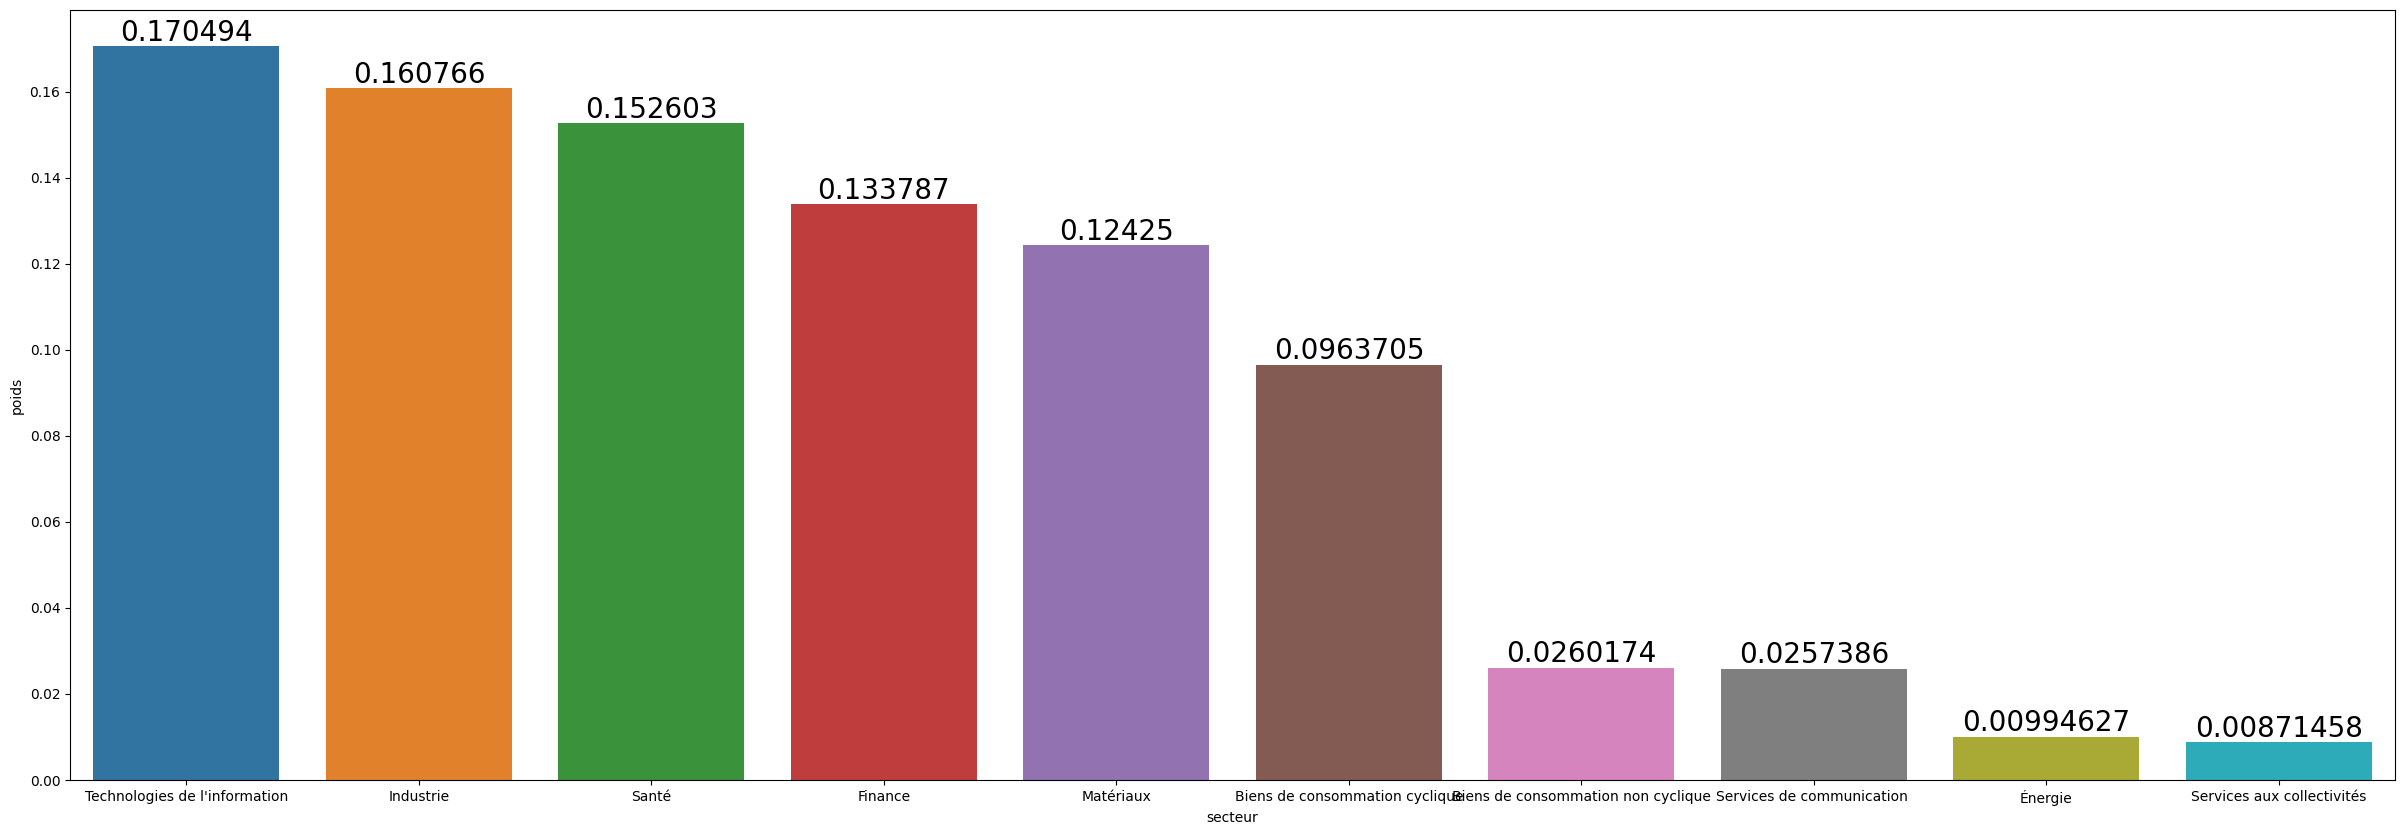

In [9]:
# Somme des poids des ISIN en fonction de leur secteur
target_col = 'secteur'
temp = msci_world.groupby(by=target_col)\
                                        .sum('poids')\
                                        .sort_values('poids', ascending=False)
temp.reset_index(inplace=True)

# Visualisation du poids des ISIN du MSCI World en fonction de leur devise 
plt.figure(figsize=(30, 10))


ax = sns.barplot(data=temp,
                    x=target_col,
                    y='poids',                               
                    ci = None,) 

ax.bar_label(ax.containers[0], fontsize=20);



## Répartition par devise


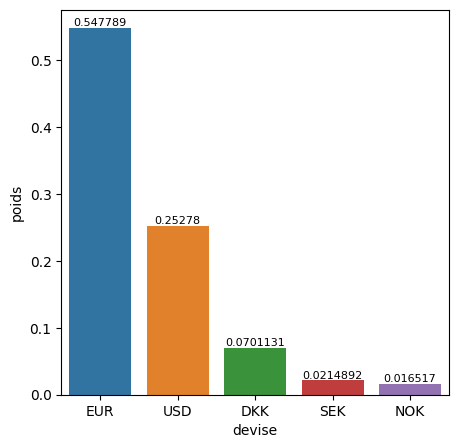

In [10]:
# Somme des poids des ISIN en fonction de leur devise
target_col = 'devise'
temp = msci_world.groupby(by=target_col)\
                                        .sum('poids')\
                                        .sort_values('poids', ascending=False)
temp.reset_index(inplace=True)

# Visualisation du poids des ISIN du MSCI World en fonction de leur devise 
plt.figure(figsize=(5, 5))
ax = sns.barplot(data=temp,
                    x=target_col,
                    y='poids',
                    ci = None,) 

ax.bar_label(ax.containers[0], fontsize=8);

## Répartition par pays


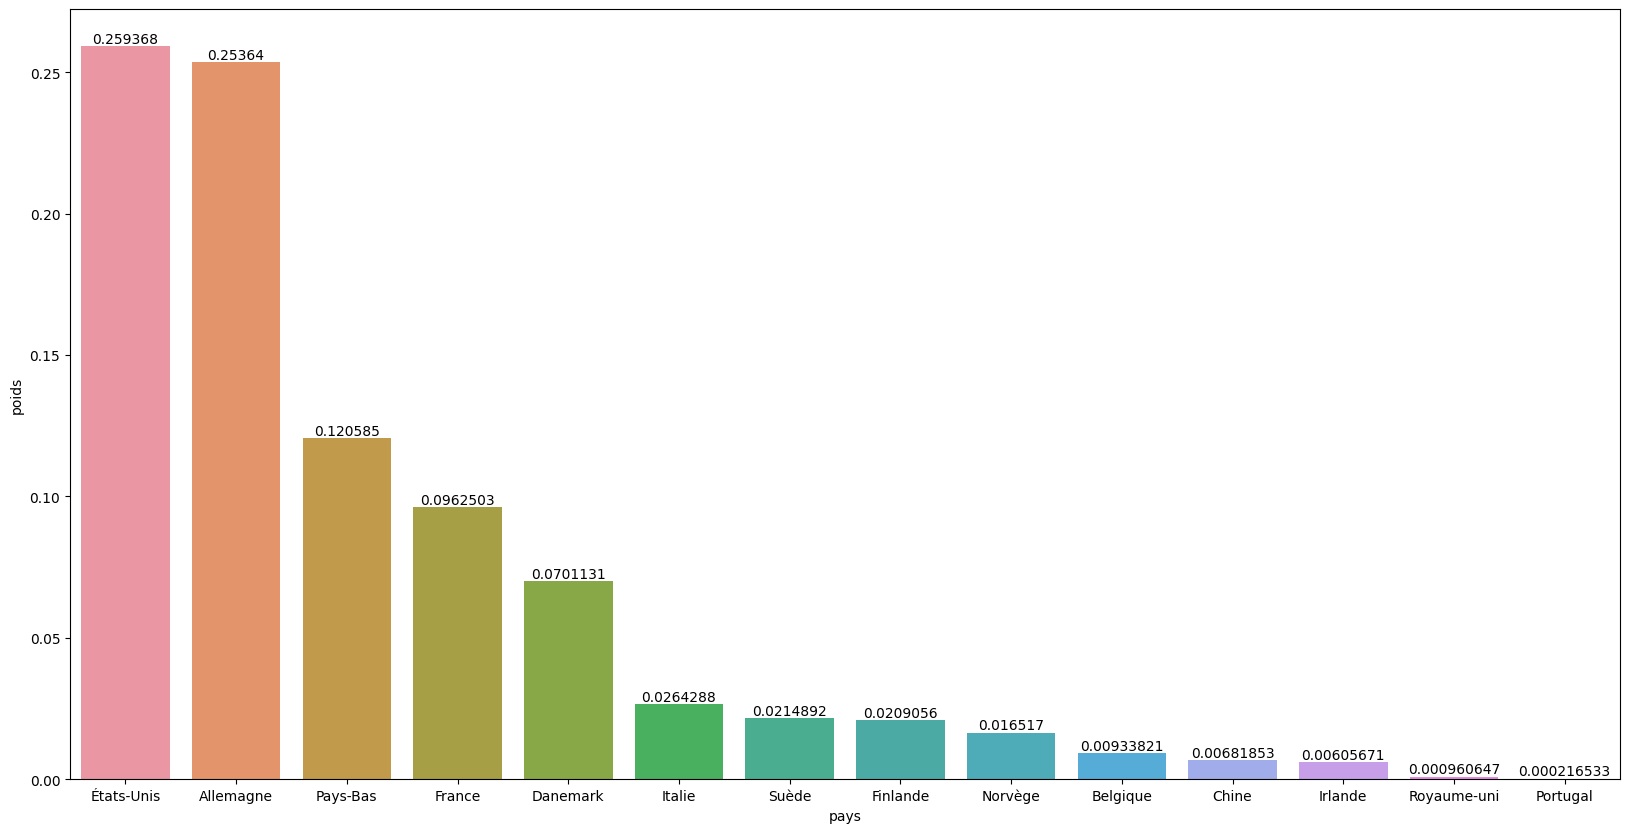

In [11]:
# Somme des poids des ISIN en fonction de leur pays
target_col = 'pays'
poids_devise = msci_world.groupby(by=target_col)\
                                        .sum('poids')\
                                        .sort_values('poids', ascending=False)
poids_devise.reset_index(inplace=True)

# Visualisation du poids des ISIN du MSCI World en fonction de leur devise 
plt.figure(figsize=(20, 10))

ax = sns.barplot(data=poids_devise,
                    x=target_col,
                    y='poids',
                    ci = None,) 

ax.bar_label(ax.containers[0], fontsize=10);




# Récupération des tickers


In [12]:
# # Récupération des codes isin
# codes = msci_world['code_isin'].values.tolist()

# # Récupération des tickers
# import requests
# import json
# import os

# isin_ticker_dict = {}
# isin_list = []
# ticker_list =[]

# # URL de l'API OpenFIGI
# url = "https://api.openfigi.com/v3/mapping"

# # Remplacez par votre clé API obtenue depuis OpenFIGI
# OPEN_FIGI_API_KEY = os.environ.get("OPEN_FIGI_API_KEY")
# api_key = OPEN_FIGI_API_KEY


# for code in codes : 
#     # ISIN à rechercher
# #     isin = "US0378331005"  # ISIN d'Apple Inc., à remplacer par celui que vous souhaitez
#     isin = code  # ISIN d'Apple Inc., à remplacer par celui que vous souhaitez

#     # Payload de la requête
#     headers = {
#         'Content-Type': 'application/json',
#         'X-OPENFIGI-APIKEY': api_key
#     }

#     payload = [{
#         "idType": "ID_ISIN",
#         "idValue": isin
#     }]

#     # Envoi de la requête à l'API
#     response = requests.post(url, headers=headers, data=json.dumps(payload))

#     # Vérification et affichage des résultats
#     if response.status_code == 200:
#         data = response.json()
#         if data and data[0]['data']:
#             ticker = data[0]['data'][0]['ticker']
#             print(f"Le ticker associé à l'ISIN {isin} est : {ticker}")
#             isin_list.append(isin)
#             ticker_list.append(ticker)
#         else:
#             print("Aucune donnée trouvée pour cet ISIN.")
#     else:
#         print(f"Erreur {response.status_code} : {response.text}")     

# # Create a dataframe with 2 columns : isin and ticker
# isin_ticker_dict['isin'] = isin_list
# isin_ticker_dict['ticker'] = ticker_list
# isin_ticker_df = pd.DataFrame(isin_ticker_dict)
# # Save the dataframe with isin and ticker locally
# path_to_data = '../data/raw_data/'
# isin_ticker_df.to_csv(path_to_data + 'isin_ticker_df.csv')

## Ajouter les tickers aux données initiales


In [13]:
# Charger la dataframe isin et tickers
path_to_data = '../data/raw_data/'
isin_ticker_df = pd.read_csv(path_to_data + 'isin_ticker_df.csv')
isin_ticker_df.head()

,Unnamed: 0,isin,ticker
0,0,DE0007164600,SAP
1,1,IE000S9YS762,LIN
2,2,DK0062498333,NO
3,3,NL0000235190,EADSF
4,4,US67066G1040,NVDA


In [14]:
# Keep only isin and ticker columns
isin_ticker_df = isin_ticker_df[['isin', 'ticker']].rename(columns={'isin' : 'code_isin'})
pd.merge(msci_world, isin_ticker_df, how='left', on = 'code_isin')

,code_isin,nom,classe_actifs,devise,poids,secteur,pays,ticker
0,DE0007164600,SAP SE / XETRA,EQUITY,EUR,0.079253,Technologies de l'information,Allemagne,SAP
1,IE000S9YS762,LINDE PLC,EQUITY,USD,0.053559,Matériaux,États-Unis,LIN
2,DK0062498333,NOVO NORDISK A/S-B,EQUITY,DKK,0.051679,Santé,Danemark,NO
3,NL0000235190,AIRBUS SE,EQUITY,EUR,0.051574,Industrie,France,EADSF
4,US67066G1040,NVIDIA CORP,EQUITY,USD,0.040901,Technologies de l'information,États-Unis,NVDA
...,...,...,...,...,...,...,...,...
147,FR0010411983,SCOR SE,EQUITY,EUR,0.000051,Finance,France,SCRUSD
148,PTGAL0AM0009,GALP ENERGIA -B,EQUITY,EUR,0.000034,Énergie,Portugal,GALP
149,US1491231015,CATERPILLAR INC,EQUITY,USD,0.000031,Industrie,États-Unis,CAT
150,SE0000114837,TRELLEBORG AB,EQUITY,SEK,0.000030,Industrie,Suède,TRELB


# Récupération des données temporelles


In [15]:
import yfinance as yf

ticker = "AAPL"  # Remplacer par le ticker associé à l'ISIN
data = yf.Ticker(ticker)

# Télécharger les données historiques
historical_data = data.history(period="10y")
historical_data.reset_index(inplace=True)

# Creation de colonnes Jour, mois, année
historical_data['Day'] = historical_data['Date'].dt.day
historical_data['Month'] = historical_data['Date'].dt.month
historical_data['Year'] = historical_data['Date'].dt.year


In [16]:
# Création colonne Close_plus_1 (i.e décalage vers le haut de Close)
historical_data['Close_plus_1'] = historical_data['Close'].shift(-1)
historical_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Day,Month,Year,Close_plus_1
0,2014-10-01 00:00:00-04:00,22.328650,22.350849,21.909114,22.015663,205965200,0.0,0.0,1,10,2014,22.175486
1,2014-10-02 00:00:00-04:00,22.035639,22.246518,21.762609,22.175486,191031200,0.0,0.0,2,10,2014,22.113329
2,2014-10-03 00:00:00-04:00,22.073373,22.244294,21.984582,22.113329,173878400,0.0,0.0,3,10,2014,22.113329
3,2014-10-06 00:00:00-04:00,22.186580,22.341965,22.068933,22.113329,148204800,0.0,0.0,6,10,2014,21.920218
4,2014-10-07 00:00:00-04:00,22.071162,22.224326,21.915779,21.920218,168376800,0.0,0.0,7,10,2014,22.375267
...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2024-09-24 00:00:00-04:00,228.649994,229.350006,225.729996,227.369995,43556100,0.0,0.0,24,9,2024,226.369995
2512,2024-09-25 00:00:00-04:00,224.929993,227.289993,224.020004,226.369995,42308700,0.0,0.0,25,9,2024,227.520004
2513,2024-09-26 00:00:00-04:00,227.300003,228.500000,225.410004,227.520004,36636700,0.0,0.0,26,9,2024,227.789993
2514,2024-09-27 00:00:00-04:00,228.460007,229.520004,227.300003,227.789993,34026000,0.0,0.0,27,9,2024,233.000000


In [17]:
# Shape
historical_data.shape

(2516, 12)

In [18]:
# Columns
historical_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Day', 'Month', 'Year', 'Close_plus_1'],
      dtype='object')

In [19]:
# Statistics
historical_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Day,Month,Year,Close_plus_1
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2515.000000
mean,88.933092,89.889931,88.035153,89.004530,1.211475e+08,0.002995,0.001590,15.731320,6.544913,2019.243641,89.031165
std,62.518560,63.185648,61.896139,62.572373,6.947857e+07,0.024121,0.079745,8.759122,3.426822,2.905103,62.570548
min,20.642058,21.025082,20.520495,20.720034,2.404830e+07,0.000000,0.000000,1.000000,1.000000,2014.000000,20.720034
25%,32.956889,33.130899,32.778230,32.959809,7.424092e+07,0.000000,0.000000,8.000000,4.000000,2017.000000,32.989485
50%,54.497826,54.910831,53.986549,54.320656,1.034946e+08,0.000000,0.000000,16.000000,7.000000,2019.000000,54.330799
75%,146.652086,148.399926,145.383007,146.876358,1.480748e+08,0.000000,0.000000,23.000000,10.000000,2022.000000,146.876358
max,236.206595,236.955728,232.820515,234.548523,6.488252e+08,0.250000,4.000000,31.000000,12.000000,2024.000000,234.548523


In [20]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          2516 non-null   datetime64[ns, America/New_York]
 1   Open          2516 non-null   float64                         
 2   High          2516 non-null   float64                         
 3   Low           2516 non-null   float64                         
 4   Close         2516 non-null   float64                         
 5   Volume        2516 non-null   int64                           
 6   Dividends     2516 non-null   float64                         
 7   Stock Splits  2516 non-null   float64                         
 8   Day           2516 non-null   int64                           
 9   Month         2516 non-null   int64                           
 10  Year          2516 non-null   int64                           
 11  Clos

## Duplicates


In [21]:
# Check number of rows before removing duplicates
print(f"Number of rows : {len(historical_data)}")

# Compute the number of duplicated rows
print(f"Number of duplicated rows : {historical_data.duplicated().sum()}")

# Remove duplicates
# data = data.drop_duplicates() 

Number of rows : 2516
Number of duplicated rows : 0


## Cleaning missing data


In [22]:
def get_missing_data(data):       
    # Counting the percentage of NaN for each column
    missing_data = data.isnull().sum().sort_values(ascending=False)/len(data)*100 #NaN percentage for each column

    # missing_data
    missing_data = missing_data[missing_data > 0]

    #Missing data column names
    missing_cols = missing_data.index.values.tolist()

    #Show missing data in percent
    return missing_data

missing_data = get_missing_data(historical_data)
missing_data

Close_plus_1    0.039746
dtype: float64

In [23]:
historical_data.dropna(axis = 0, subset='Close_plus_1', inplace=True)

In [24]:
missing_data = get_missing_data(historical_data)
missing_data

Series([], dtype: float64)

In [25]:
historical_data


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Day,Month,Year,Close_plus_1
0,2014-10-01 00:00:00-04:00,22.328650,22.350849,21.909114,22.015663,205965200,0.0,0.0,1,10,2014,22.175486
1,2014-10-02 00:00:00-04:00,22.035639,22.246518,21.762609,22.175486,191031200,0.0,0.0,2,10,2014,22.113329
2,2014-10-03 00:00:00-04:00,22.073373,22.244294,21.984582,22.113329,173878400,0.0,0.0,3,10,2014,22.113329
3,2014-10-06 00:00:00-04:00,22.186580,22.341965,22.068933,22.113329,148204800,0.0,0.0,6,10,2014,21.920218
4,2014-10-07 00:00:00-04:00,22.071162,22.224326,21.915779,21.920218,168376800,0.0,0.0,7,10,2014,22.375267
...,...,...,...,...,...,...,...,...,...,...,...,...
2510,2024-09-23 00:00:00-04:00,227.339996,229.449997,225.809998,226.470001,54146000,0.0,0.0,23,9,2024,227.369995
2511,2024-09-24 00:00:00-04:00,228.649994,229.350006,225.729996,227.369995,43556100,0.0,0.0,24,9,2024,226.369995
2512,2024-09-25 00:00:00-04:00,224.929993,227.289993,224.020004,226.369995,42308700,0.0,0.0,25,9,2024,227.520004
2513,2024-09-26 00:00:00-04:00,227.300003,228.500000,225.410004,227.520004,36636700,0.0,0.0,26,9,2024,227.789993


## Define X and y


In [26]:
# Define X and y
X = historical_data.drop(columns=['Date','Close_plus_1'])
# y = historical_data[['Date', 'Close_plus_1']]
y = historical_data[['Close_plus_1']]

## Train test split


In [27]:
# Models
from sklearn.model_selection import train_test_split


In [28]:
# Separating train set from test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)


In [29]:
# Display shapes
print(f"Shape of X_train : {X_train.shape}")
print(f"Shape of X_test : {X_test.shape}")
print(f"Shape of y_train : {y_train.shape}")
print(f"Shape of y_test : {y_test.shape}")


Shape of X_train : (1760, 10)
Shape of X_test : (755, 10)
Shape of y_train : (1760, 1)
Shape of y_test : (755, 1)


# Identificate numerical columns


In [30]:
# Extract numerical columns from original dataset
numerical_columns = X_train.select_dtypes(include = np.number).columns
numerical_columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Day', 'Month', 'Year'],
      dtype='object')

# Check outliers



### Visual checks for outliers


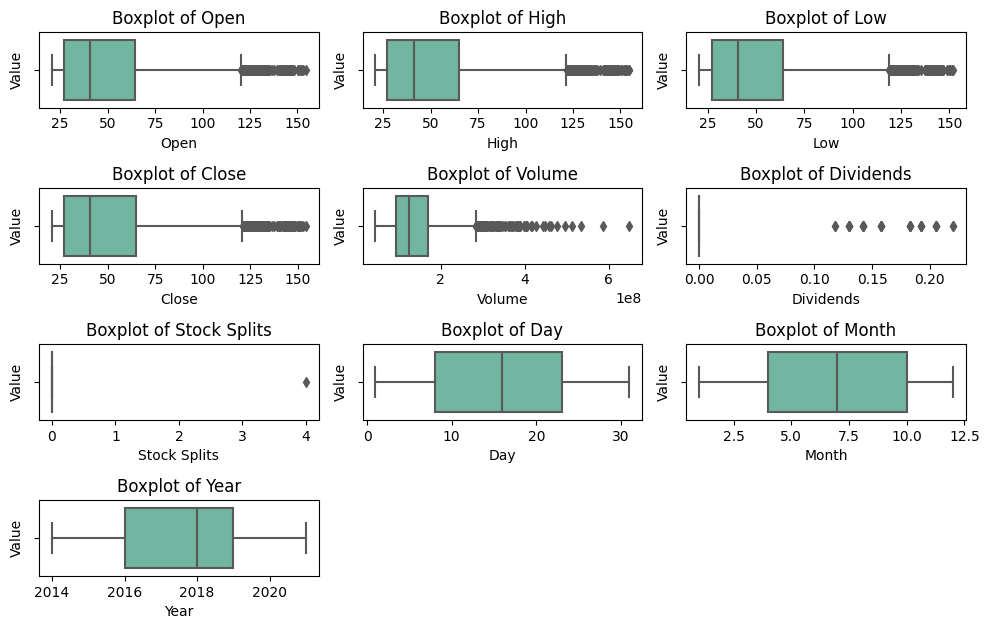

In [31]:
# Plot boxplots of each numerical column
plt.figure(figsize=(10, 20))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(13, 3, i)    
    sns.boxplot(x=X_train[column], palette='Set2')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()


<span style="font-family:Comic Sans MS; color:red">Plot a specific boxplot. Insert column name below : </span>
    

In [32]:
specific_column = 'Volume'

Text(0, 0.5, 'Value')

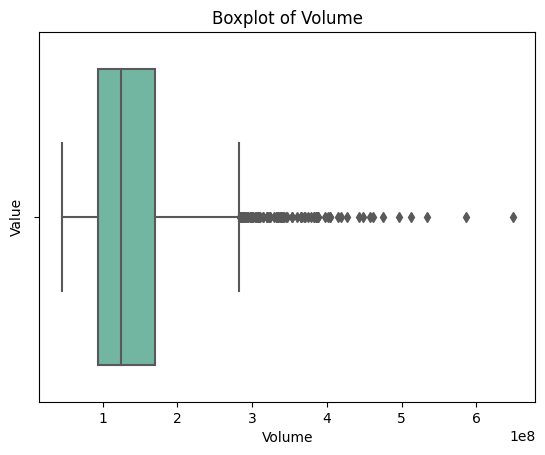

In [33]:
# Plot a specific boxplot
sns.boxplot(x=X_train[specific_column], palette='Set2')
plt.title(f'Boxplot of {specific_column}')
plt.xlabel(specific_column)
plt.ylabel('Value')


### Numerical check for outliers


<span style="font-family:Comic Sans MS; color:red"> Let's numerically extract the columns with outliers ! </span>


In [34]:
# Identify the columns with outliers
numerical_columns_w_outliers = []
numerical_columns_no_outliers = []

for col in numerical_columns: 
    # Calculate IQR
    iqr_value = iqr(X_train[col])

    #Calculate 1st quartile
    q1 = np.percentile(X_train[col],25)

    #Calculate 3rd quartile
    q3 = np.percentile(X_train[col],75)

    #Calculate lower limit below which data point is considered an outlier
    outlier_lim_low = q1 - 1.5 * iqr_value

    #Calculate higher limit above which data point is considered an outlier
    outlier_lim_high = q3 + 1.5 * iqr_value
    
    #Calculate number of 'low' outliers
    outlier_condition_low = X_train[col] < outlier_lim_low
    number_outliers_low = len(X_train[outlier_condition_low][col])
    
    #Calculate number of 'high' outliers
    outlier_condition_high = X_train[col] > outlier_lim_high
    number_outliers_high = len(X_train[outlier_condition_high][col])
    
    #Calculate total number of outliers
    number_outliers_total = number_outliers_low + number_outliers_high
    
#     print(f'------------------  {col}  -----------------------')
#     print(f'Number of outliers : {number_outliers_total}')
#     print('---------------------------------------------------')
    
    #If any outliers in column, column is added to a list of columns with outliers
    if number_outliers_total > 0:
        numerical_columns_w_outliers.append(col)
    elif number_outliers_total == 0:
        numerical_columns_no_outliers.append(col)
        

<span style="font-family:Comic Sans MS; color:red">Let's display the numerical columns WITH outliers :  </span>


In [35]:
numerical_columns_w_outliers

['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']

<span style="font-family:Comic Sans MS; color:red">Let's display the numerical columns WITHOUT outliers :  </span>


In [36]:
numerical_columns_no_outliers

['Day', 'Month', 'Year']

### Scaling numerical columns with outliers


In [37]:
X_train.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Day,Month,Year
0,22.328650,22.350849,21.909114,22.015663,205965200,0.0,0.0,1,10,2014
1,22.035639,22.246518,21.762609,22.175486,191031200,0.0,0.0,2,10,2014
2,22.073373,22.244294,21.984582,22.113329,173878400,0.0,0.0,3,10,2014
3,22.186580,22.341965,22.068933,22.113329,148204800,0.0,0.0,6,10,2014
4,22.071162,22.224326,21.915779,21.920218,168376800,0.0,0.0,7,10,2014


In [38]:
from sklearn.preprocessing import RobustScaler

# Instantiate the robust scaler
rb_scaler = RobustScaler() 

# Fit the robust scaler on X_train
rb_scaler.fit(X_train[numerical_columns_w_outliers]) 

# Transform X_train and X_test through the fitted robust scaler
X_train[numerical_columns_w_outliers] = rb_scaler.transform(X_train[numerical_columns_w_outliers])
X_test[numerical_columns_w_outliers] = rb_scaler.transform(X_test[numerical_columns_w_outliers])

# Scaling numerical columns with NO outliers




In [39]:
X_train[numerical_columns_no_outliers].describe()

,Day,Month,Year
count,1760.000000,1760.000000,1760.000000
mean,15.726705,6.542045,2017.742045
std,8.744804,3.424728,2.045932
min,1.000000,1.000000,2014.000000
25%,8.000000,4.000000,2016.000000
50%,16.000000,7.000000,2018.000000
75%,23.000000,10.000000,2019.000000
max,31.000000,12.000000,2021.000000


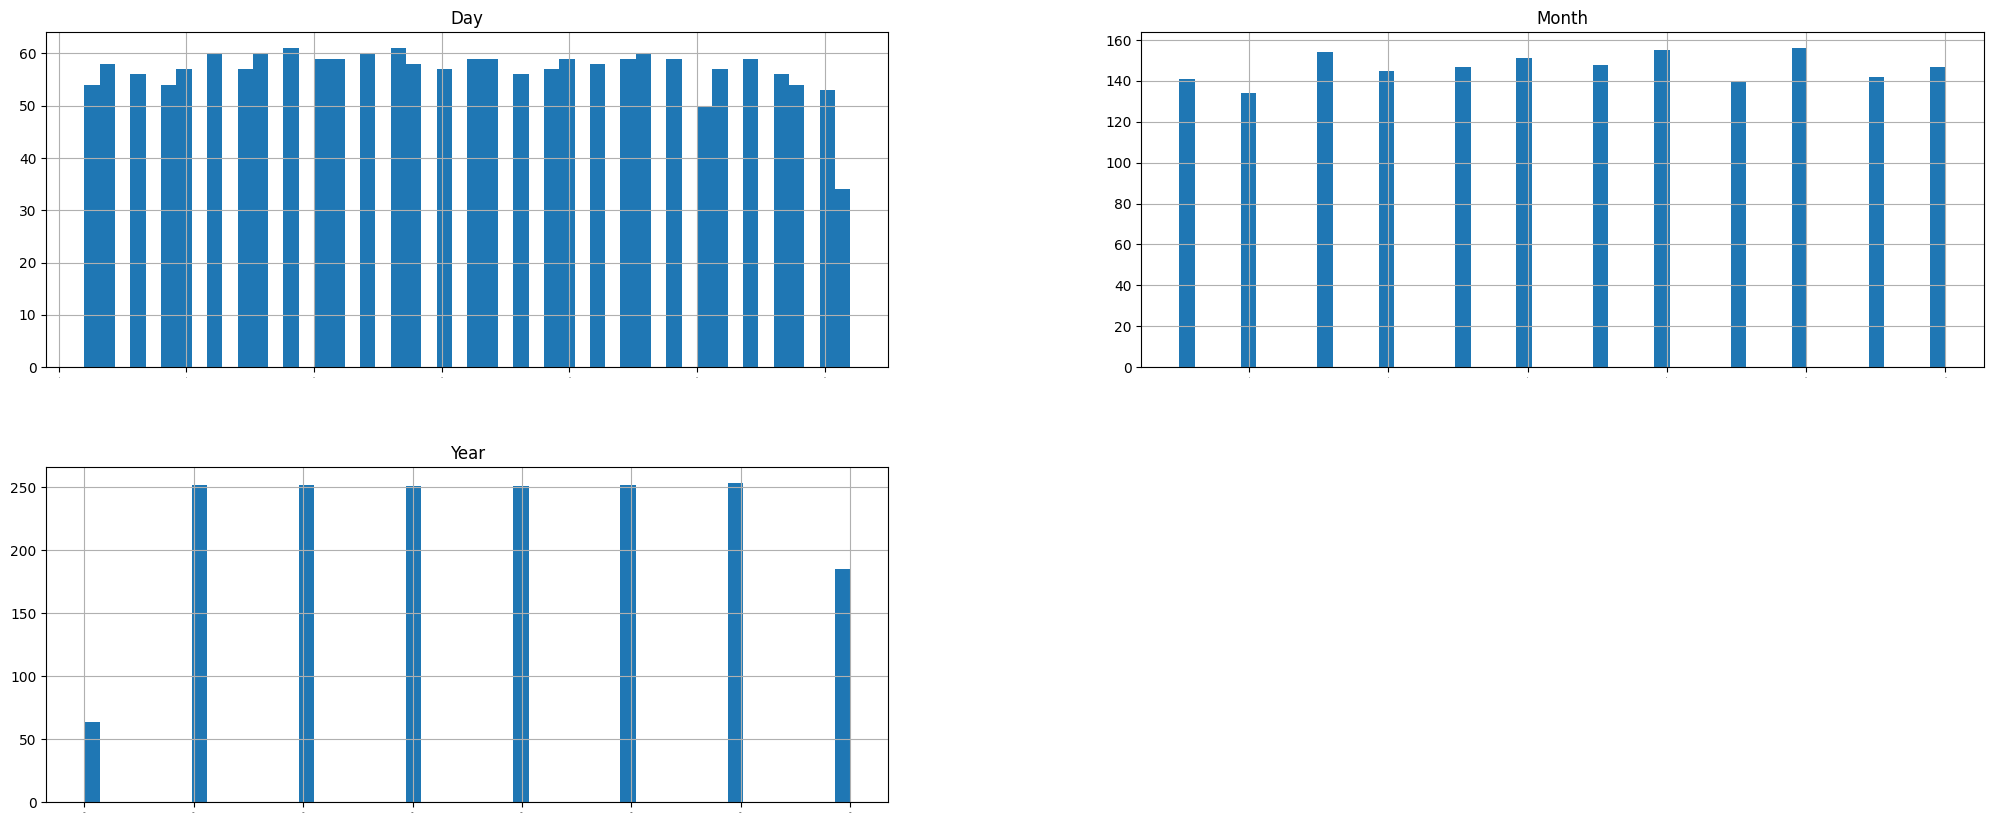

In [40]:
# Data histograms
X_train[numerical_columns_no_outliers].hist(bins = 50, figsize = (25,10), xlabelsize=0)
plt.show()


In [41]:
X_train[numerical_columns_no_outliers].head()

,Day,Month,Year
0,1,10,2014
1,2,10,2014
2,3,10,2014
3,6,10,2014
4,7,10,2014


In [42]:
from sklearn.preprocessing import StandardScaler

# Instantiate the robust scaler
std_scaler = StandardScaler()

# Fit the robust scaler on X_train
rb_scaler.fit(X_train[numerical_columns_no_outliers]) 

# Transform X_train and X_test through the fitted robust scaler
X_train[numerical_columns_no_outliers] = rb_scaler.transform(X_train[numerical_columns_no_outliers])
X_test[numerical_columns_no_outliers] = rb_scaler.transform(X_test[numerical_columns_no_outliers])

In [43]:
X_train[numerical_columns_no_outliers].head()

,Day,Month,Year
0,-1.000000,0.5,-1.333333
1,-0.933333,0.5,-1.333333
2,-0.866667,0.5,-1.333333
3,-0.666667,0.5,-1.333333
4,-0.600000,0.5,-1.333333


In [44]:
X_train

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Day,Month,Year
0,-0.493695,-0.496897,-0.505018,-0.499630,1.078458,0.0,0.0,-1.000000,0.500000,-1.333333
1,-0.501549,-0.499662,-0.509001,-0.495372,0.881846,0.0,0.0,-0.933333,0.500000,-1.333333
2,-0.500538,-0.499721,-0.502967,-0.497028,0.656024,0.0,0.0,-0.866667,0.500000,-1.333333
3,-0.497503,-0.497132,-0.500674,-0.497028,0.318022,0.0,0.0,-0.666667,0.500000,-1.333333
4,-0.500597,-0.500250,-0.504837,-0.502173,0.583593,0.0,0.0,-0.600000,0.500000,-1.333333
...,...,...,...,...,...,...,...,...,...,...
1755,2.702141,2.680453,2.716915,2.672498,-0.634764,0.0,0.0,0.333333,0.333333,1.000000
1756,2.715849,2.728162,2.741513,2.735917,-0.627256,0.0,0.0,0.400000,0.333333,1.000000
1757,2.773846,2.745108,2.793383,2.761599,-0.779528,0.0,0.0,0.466667,0.333333,1.000000
1758,2.747748,2.755275,2.791243,2.763957,-0.929090,0.0,0.0,0.533333,0.333333,1.000000


# Expand dimensions



In [45]:
# Expand dimensions of X_train and X_test
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

print(X_train.shape)
print(X_test.shape)


(1760, 1, 10)
(755, 1, 10)


In [46]:
# Expand dimensions of y_train and y_test
y_train = np.expand_dims(y_train, axis=1)
y_test = np.expand_dims(y_test, axis=1)

print(y_train.shape)
print(y_test.shape)



(1760, 1, 1)
(755, 1, 1)


In [47]:
# Create RNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

def define_RNN_model():
    # 1- RNN Architecture
    model = Sequential()
    model.add(layers.LSTM(units=2, activation='tanh', input_shape=X_train.shape[1:3]))
    model.add(layers.Dense(1, activation="linear"))

    # 2- Compilation
    model.compile(loss='mse', optimizer='adam', metrics =['mse', 'mae'])
    
    return model



In [48]:
model = define_RNN_model()

# Fitting RNN model
es = EarlyStopping(patience = 50, restore_best_weights=True)

history = model.fit(x=X_train,
                    y=y_train,
                    batch_size=16,
                    epochs=1000,
                    verbose=0,
                    callbacks=[es],
                    validation_split=0.3,
                    shuffle=False)


In [49]:
history.__dict__

{'validation_data': None,
 '_model': <Sequential name=sequential, built=True>,
 'history': {'loss': [1237.1612548828125,
   1228.9979248046875,
   1220.6983642578125,
   1211.3494873046875,
   1200.3505859375,
   1187.383056640625,
   1172.65966796875,
   1156.812255859375,
   1140.5084228515625,
   1124.1968994140625,
   1108.09130859375,
   1092.2547607421875,
   1076.6805419921875,
   1061.33984375,
   1046.205810546875,
   1031.2579345703125,
   1016.486328125,
   1001.889404296875,
   987.4713134765625,
   973.2408447265625,
   959.2078857421875,
   945.3825073242188,
   931.7740478515625,
   918.3892211914062,
   905.2330322265625,
   892.3068237304688,
   879.611083984375,
   867.1436767578125,
   854.90087890625,
   842.8788452148438,
   831.071533203125,
   819.473388671875,
   808.078125,
   796.8793334960938,
   785.870361328125,
   775.04541015625,
   764.3982543945312,
   753.9227294921875,
   743.61328125,
   733.4647216796875,
   723.4716186523438,
   713.62939453125,
  

In [70]:
def plot_loss_metric(history, metric, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))

    # --- LOSS --- 

    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])

    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')

    min_loss = min(min(history.history['loss']),min(history.history['val_loss']))
    max_loss = max(max(history.history['loss']),max(history.history['val_loss']))
    ax[0].set_ylim((min_loss,max_loss))

    ax[0].legend(['Train', 'Test'], loc='best')

    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)

    # --- METRIC

    ax[1].plot(history.history[metric])
    ax[1].plot(history.history[f'val_{metric}'])

    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel(metric)
    
    ax[1].set_xlabel('Epoch')

    ax[1].legend(['Train', 'Test'], loc='best')
    
    min_metric = min(min(history.history[metric]),min(history.history[f'val_{metric}']))
    max_metric = max(max(history.history[metric]),max(history.history[f'val_{metric}']))
    ax[1].set_ylim((min_metric,max_metric))

    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)

    if title:
        fig.suptitle(title)

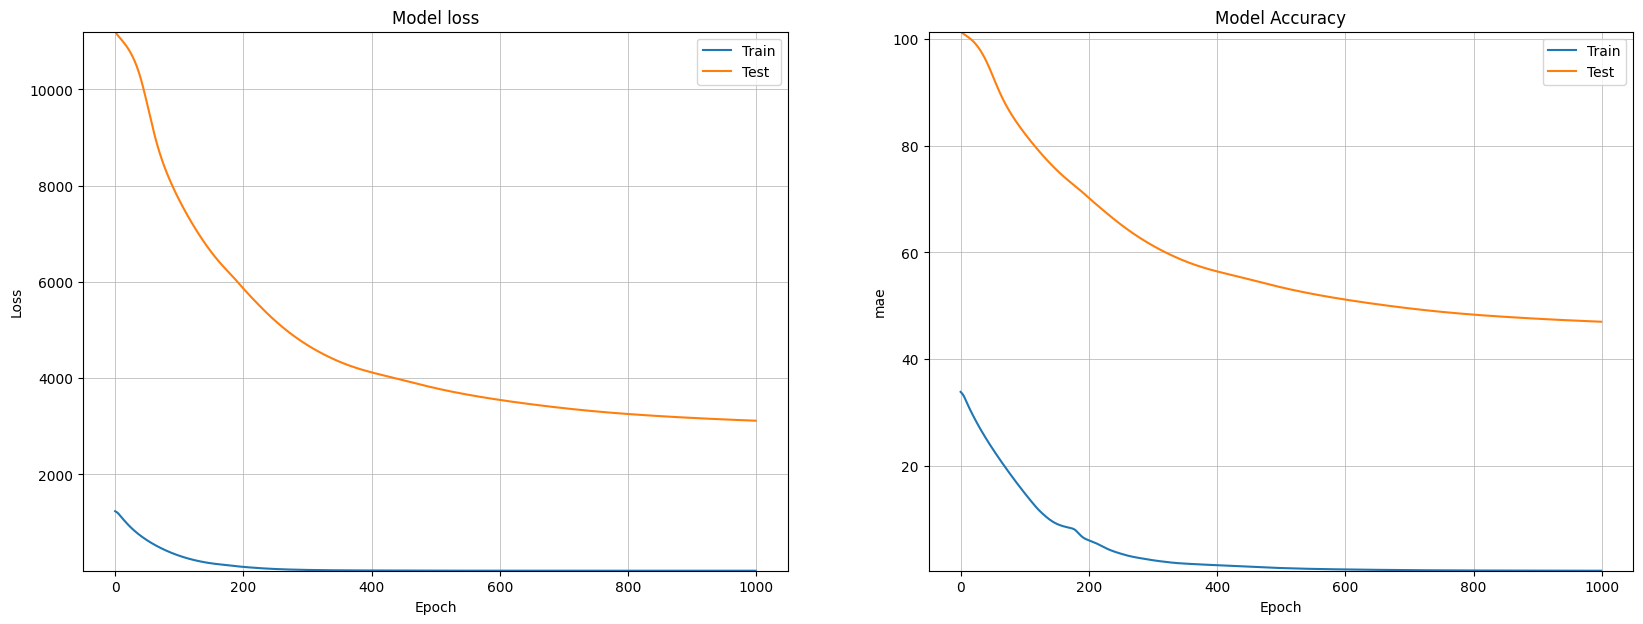

In [72]:
plot_loss_metric(history, 'mae')


In [ ]:
model.evaluate(X_test,y_test)
